In [1]:

%reset -f 
import numpy as np

import pandas as pd
import seaborn as sns

from scipy.interpolate import *

import matplotlib.pyplot as plt
#%matplotlib qt #separate window plot
#%matplotlib inline #html plot

#switch OFF few warnings:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)# Matplot axis copy warning

pd.options.mode.chained_assignment = None  # default='warn'   pandas copy chained_assignment

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, minimize, report_fit


def gauss(x, amp, cen, sigma):
    """Gaussian lineshape."""
    return amp * np.exp(-(x-cen)**2 / (2.*sigma**2))


def gauss_dataset(params, i, x):
    """Calculate Gaussian lineshape from parameters for data set."""
    amp = params['amp_%i' % (i+1)]
    cen = params['cen_%i' % (i+1)]
    sig = params['sig_%i' % (i+1)]
    return gauss(x, amp, cen, sig)


def objective(params, x, data):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - gauss_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

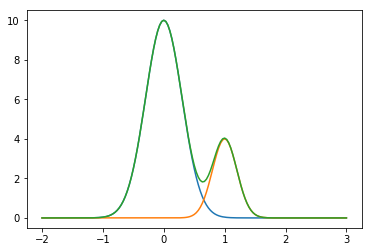

In [35]:
x = np.linspace(-2, 3, 151)
y=gauss(x,10,0,0.3)
# x2 = np.linspace(-1, 3, 151)
y2=gauss(x,4,1,0.2)
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y+y2)

[60 90]


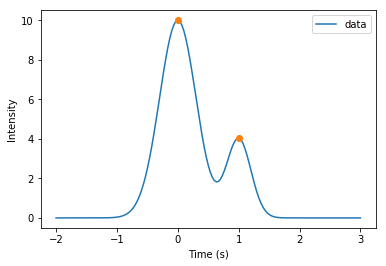

In [46]:
#find maximum values of various peaks
#Determine peak position #peaks
from scipy.signal import find_peaks


X=np.array(x)
Y=np.array(y+y2)
#find peaks in BE 
peaks, param = find_peaks(Y,distance=2, height=0.6,prominence=0.002)#prominence=0.005
print(peaks)
#     #manually insert missing peaks
#     peaks[i]=np.insert(peaksinit,1,[peaksinit[0]-5])
#     peaks[i]=np.insert(peaks[i],2,[peaksinit[0]+20])

# plt.subplot(subnum)
plt.plot(X, Y,label='data')
plt.plot(X[peaks],Y[peaks],"o") 
plt.ylabel('Intensity')#plt.ylabel(col_names[Darkcol[0]-1])
plt.xlabel('Time (s)')
plt.legend()
#plt.plot(fig)
plt.show()

In [5]:
x = np.linspace(-1, 2, 151)
data = []
for i in np.arange(5):
    params = Parameters()
    amp = 0.60 + 9.50*np.random.rand()
    cen = -0.20 + 1.20*np.random.rand()
    sig = 0.25 + 0.03*np.random.rand()
    dat = gauss(x, amp, cen, sig) + np.random.normal(size=x.size, scale=0.1)
    data.append(dat)
data = np.array(data)

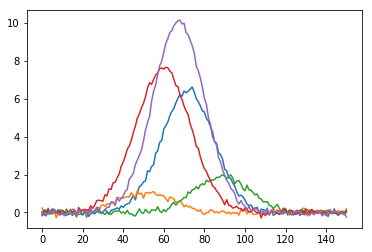

In [16]:
data.shape
plt.plot(range(151),data[0])
plt.plot(range(151),data[1])
plt.plot(range(151),data[2])
plt.plot(range(151),data[3])
plt.plot(range(151),data[4])

In [7]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('cen_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

In [8]:
for iy in (2, 3, 4, 5):
    fit_params['sig_%i' % iy].expr = 'sig_1'

[[Variables]]
    amp_1:  6.43837633 +/- 0.02479689 (0.39%) (init = 0.5)
    cen_1:  0.43727615 +/- 0.00134564 (0.31%) (init = 0.4)
    sig_1:  0.25923780 +/- 6.0498e-04 (0.23%) (init = 0.3)
    amp_2:  1.06433056 +/- 0.02366411 (2.22%) (init = 0.5)
    cen_2:  0.02209062 +/- 0.00814007 (36.85%) (init = 0.4)
    sig_2:  0.25923780 +/- 6.0498e-04 (0.23%) == 'sig_1'
    amp_3:  1.95600061 +/- 0.02374146 (1.21%) (init = 0.5)
    cen_3:  0.77166570 +/- 0.00442930 (0.57%) (init = 0.4)
    sig_3:  0.25923780 +/- 6.0498e-04 (0.23%) == 'sig_1'
    amp_4:  7.75583273 +/- 0.02530509 (0.33%) (init = 0.5)
    cen_4:  0.19270740 +/- 0.00111706 (0.58%) (init = 0.4)
    sig_4:  0.25923780 +/- 6.0498e-04 (0.23%) == 'sig_1'
    amp_5:  9.92556247 +/- 0.02631691 (0.27%) (init = 0.5)
    cen_5:  0.34634266 +/- 8.7287e-04 (0.25%) (init = 0.4)
    sig_5:  0.25923780 +/- 6.0498e-04 (0.23%) == 'sig_1'
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_1, amp_5) = -0.440
    C(sig_1, amp_4) = -0

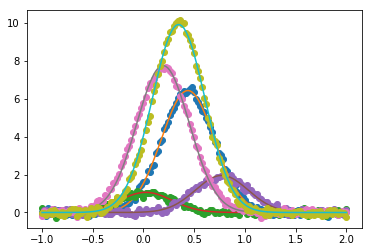

In [19]:
out = minimize(objective, fit_params, args=(x, data))
#     plt.plot(x, out.init_fit, 'k--')
# plt.plot(range(151), out.best_fit, 'r-')

report_fit(out.params)
plt.figure()
for i in range(5):
    y_fit = gauss_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()

In [52]:
fit_params = Parameters()
for iy, y in enumerate(peaks):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('cen_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

In [51]:
#Create voigt model and parameters for peaks found
from lmfit.models import VoigtModel, GaussianModel

#numpeaks=np.arange(len(peaks))

mod={}
mvoigt={}
param={}
#build voigt peaks and specify parameters
for j in peaks:
    x=np.array(X[j])
    y=np.array(Y[j])
    for itx,i in enumerate(peaks['NR1901_CX1']):
        #print(j,itx,i)
        samplestr=[]
        samplestr=j+str(itx)+'_'
        
        mvoigt[samplestr] = VoigtModel(prefix=samplestr)
        if itx==0:
            pars = mvoigt[samplestr].guess(y[i-5:i+5], x=x[i-5:i+5])
            mod [j]= mvoigt[samplestr]
        else:
            pars.update(mvoigt[samplestr].guess(y[i-5:i+5], x=x[i-5:i+5]))
            mod [j]= mod [j] + mvoigt[samplestr]
            
        pars[samplestr+ 'center'].set(x[i], min=x[i]-0.1, max=x[i]+0.1)
        pars[samplestr+ 'sigma'].set(0.25, min=0.2, max=0.4,vary=True)# sigma is set to an a narrow range because it is an instrument related value
        pars[samplestr+ 'gamma'].set(0.25, min=0.01, max=3,vary=True, expr='')
        pars[samplestr+ 'amplitude'].set(y[i]*2, min=0.1,max=y[i]*10)
        param[j]=pars#save parameters in dictionary
        print(['parameter ' + samplestr + 'created'])

NameError: name 'mod' is not defined

In [ ]:
#fit procedure

fig=plt.figure(figsize=(8,10),dpi=400)
centerVal={}
fitdata={}

for iy, y in enumerate(peaks):
    model = mod[j]
    pars = param[j]
    out = model.fit(y, pars, x=x)

#print(out.fit_report())
    plt.subplot(SubVal)
    plt.plot(x, y, 'g')
#     plt.plot(x, out.init_fit, 'k--')
    plt.plot(x, out.best_fit, 'r-')
    plt.xlabel('Photon energy (eV)')#(col_names[1])
    plt.ylabel('Normalized intensity')
    

    plot_components = True

#     fitdata [j] = pd.DataFrame()
    fitdata [j] =out.values

    
    if plot_components:
        comps = out.eval_components(x=x)
        for itx,i in enumerate(comps):
            plt.plot(x, comps[i], 'b--',label=' peak '+str(itx+1)+": "+str(round(out.values[i+'center'],2)))
            centerVal[i]=round(out.values[i+'center'],2)
    plt.title('Sample ' + j)
    plt.legend()
    SubVal+=1
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])        
fig.suptitle('NEXAFS C1s fit')
plt.savefig( pathFolder+ 'NEXAFSC1sfit.jpeg', dpi=400)
plt.show()